# Trabalho de Conclusão de Curso do NanoDegree
## Objetivo: Através de sons ambientes conseguir identificar disparos à fim de melhorar a segurança pública
### Dataset utilizado: https://serv.cusp.nyu.edu/projects/urbansounddataset/
### Libs Python Utilizadas
* Librosa - Para ler e extrair os áudios
* Numpy - Biblioteca numérica
* Pandas - Bilbioteca para ler os arquivos CSV
* TensorFlow - Biblioteca que cria o modelo de Redes Neurais
* Keras - Framework que roda "em cima" do tensorflow que cria as redes neurais
* SciKitLearn - Biblioteca de Machine Learn onde possui os algoritmos de Machine Learning

### Inspiração
Me inspirei no artigo apresentado de como analisar sons no site: https://www.analyticsvidhya.com/blog/2017/08/audio-voice-processing-deep-learning/ e assim pensei na idéia de classificação de sons de tiros e como isso poderia ajudar na segurança pública.

Para isso escolhi 3 Algoritmos, Redes Neurais, SVM e Random Forest e através dela iremos testar os 3 modelos e verificar qual deles se sai melhor com esse dataset.

### Rodar esse jupyter
A fim de não ter que instalar todas essas libs eu criei um Dockerfile que está na pasta "docker" e nele estão instalados todos as libs

O Dataset de treinamento e teste se encontram zipados em suas respectivas pastas no google drive através do endereço: Colocar o endereço





In [1]:
import pandas as pd
import collections
train_data = pd.read_csv('./train/train_original.csv')
counter_all_data = collections.Counter(train_data.Class)
print 'Nesse DataSet temos: '

for key, value in counter_all_data.items():
    print "Classe: {} possui {:} sons".format(key, value)


Nesse DataSet temos: 
Classe: siren possui 607 sons
Classe: air_conditioner possui 600 sons
Classe: children_playing possui 600 sons
Classe: car_horn possui 306 sons
Classe: street_music possui 600 sons
Classe: dog_bark possui 600 sons
Classe: drilling possui 600 sons
Classe: engine_idling possui 624 sons
Classe: jackhammer possui 668 sons
Classe: gun_shot possui 230 sons


Como pode ser observado, a classe de som que é o objetivo desse trabalho possui poucos registros, então fui procurando no youtube outros sons de tiros e cada um deles fui adicionando no meu dataset à fim de melhorar o treino.
No youtube eu encontrei mais 61 sons de tiros que ajudaram na classificação.

In [2]:
import pandas as pd
import collections

train_data = pd.read_csv('./train/train.csv')
counter_all_data = collections.Counter(train_data.Class)
print 'Nesse DataSet temos: '

for key, value in counter_all_data.items():
    print "Classe: {} possui {:} sons".format(key, value)


Nesse DataSet temos: 
Classe: siren possui 607 sons
Classe: air_conditioner possui 600 sons
Classe: children_playing possui 600 sons
Classe: car_horn possui 306 sons
Classe: street_music possui 600 sons
Classe: dog_bark possui 600 sons
Classe: drilling possui 600 sons
Classe: engine_idling possui 624 sons
Classe: jackhammer possui 668 sons
Classe: gun_shot possui 291 sons


#### Ao ler o Dataset encontramos os seguintes tipos de som
* jackhammer
* engine_idling
* siren
* air_conditioner
* children_playing
* street_music
* dog_bark
* drilling
* car_horn
* gun_shot


Abaixo vemos uma classe de som e o seu gráfico

In [3]:
import matplotlib.pyplot as plt
import librosa.display
import glob
import pandas as pd
import random

example = random.choice(train_data.index)

x, sr = librosa.load('./train/Train/' + str(train_data.ID[example]) + '.wav')
plt.figure(figsize=(12, 4))
plt.ylabel('Amplitude')
plt.title(train_data.Class[example])
librosa.display.waveplot(x, sr=sr)



E esses são os sons de tiros

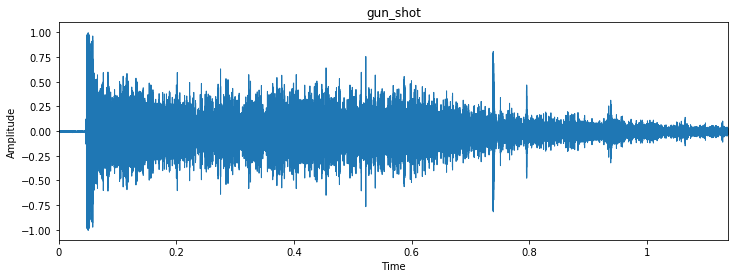

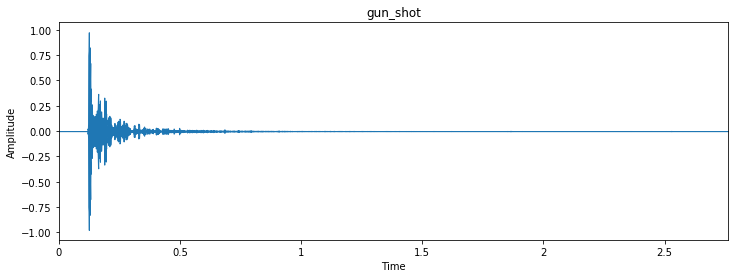

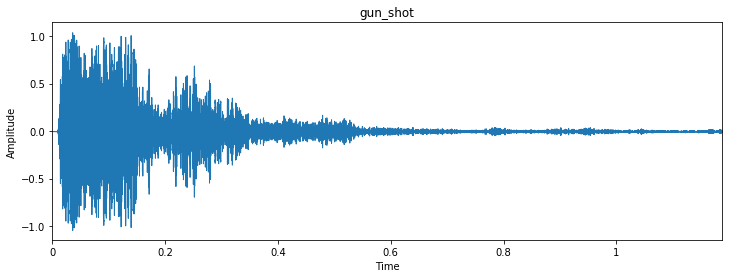

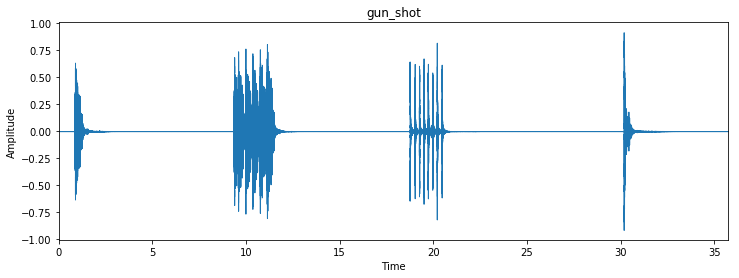

In [4]:
listSounds = ['./train/Train/12.wav', 
              './train/Train/35.wav', 
              './train/Train/6712.wav', 
              './validate/gunshots - sound effect.wav']
for sound in listSounds:
    x, sr = librosa.load(sound)
    plt.figure(figsize=(12, 4))
    librosa.display.waveplot(x, sr=sr)
    plt.title('gun_shot')
    plt.ylabel('Amplitude')

E esses são os sons de outras classes


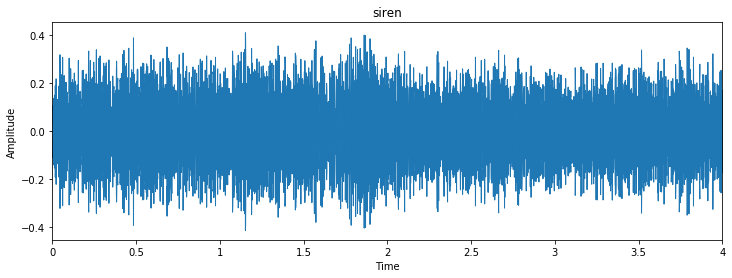

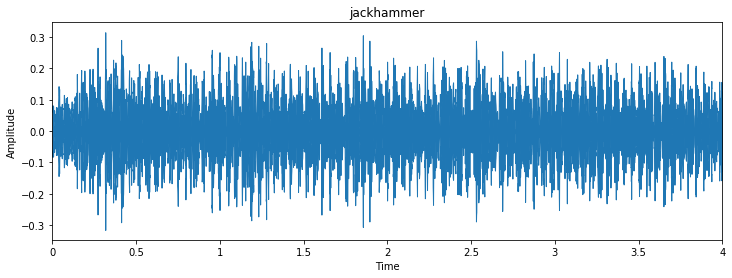

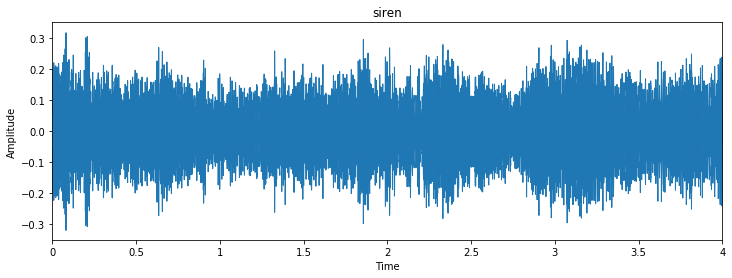

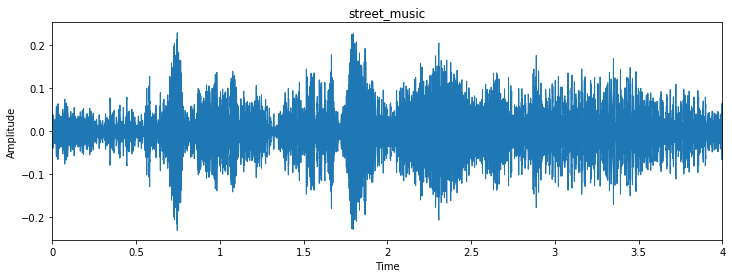

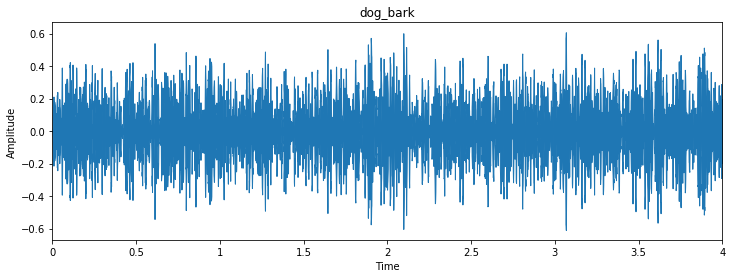

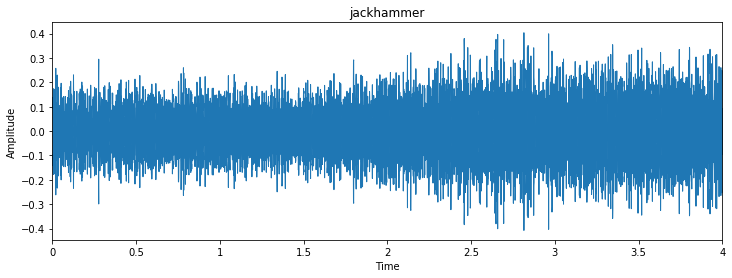

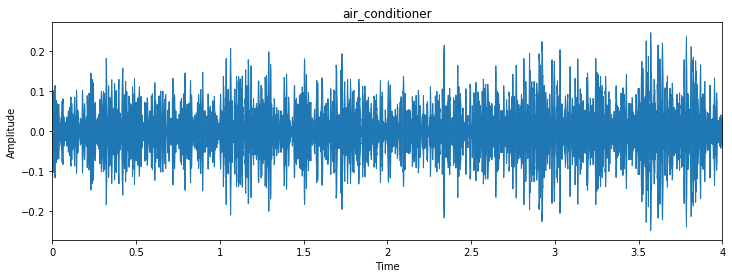

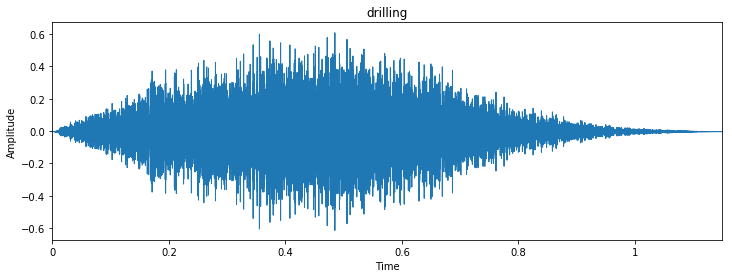

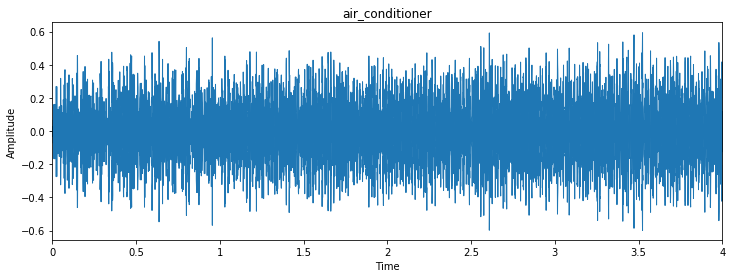

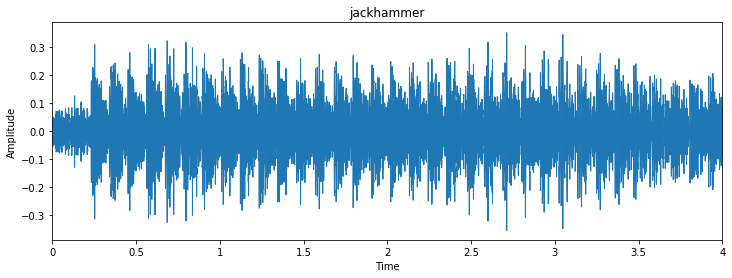

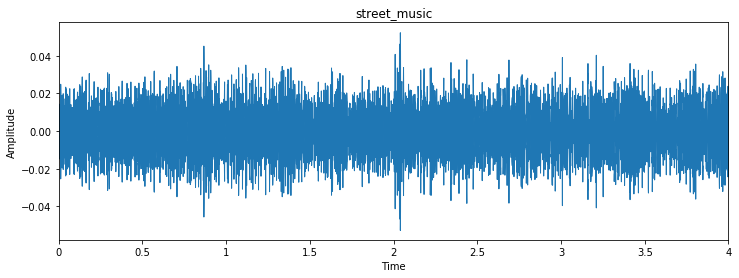

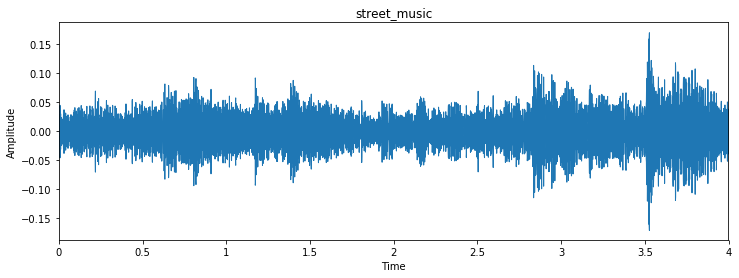

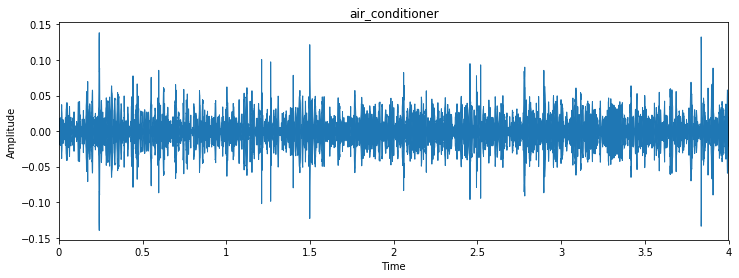

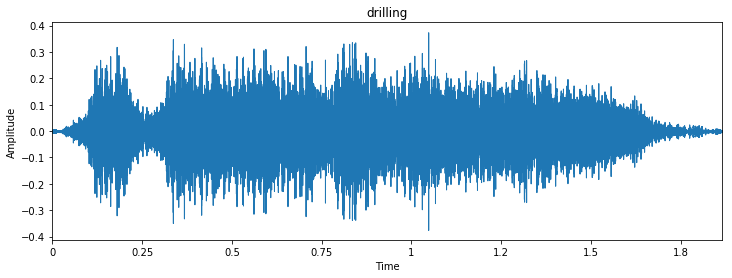

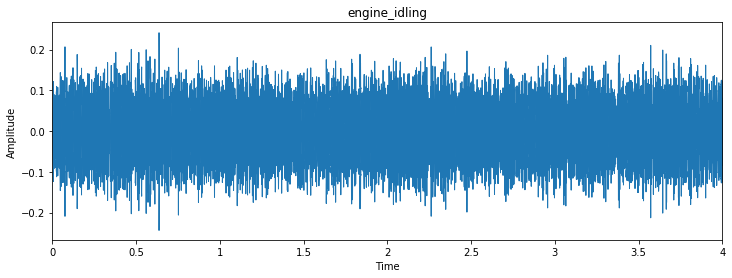

In [5]:
for index, row in train_data[60:75].iterrows():
    x, sr = librosa.load('./train/Train/' + str(row.ID) + '.wav')
    plt.figure(figsize=(12, 4))
    librosa.display.waveplot(x, sr=sr)
    plt.title(row.Class)
    plt.ylabel('Amplitude')

Como pode ver o som do tiro é bem característico perante o som dos outros sons urbanos
***
### Classificação
Abaixo então iremos criar o nosso dataset de treinamento onde será lido o arquivo de train.csv e o label será classificado como "1" se for tiro e "0" se não for tiro.
Para extrair as features do som foi utilizada a biblioteca librosa que consegue ler o áudio e foram extraídas 100 features do áudio.

É utilizado o mfcc (Mel-frequency cepstral coefficients) que é uma forma de descrever o som em termos numéricos.
https://en.wikipedia.org/wiki/Mel-frequency_cepstrum

In [6]:
#Realizar 3 tipos de classificadores, com o dataset de áudio
def parser(row):
   # function to load files and extract features
    if row.ID.endswith('.wav'):
        file_name = './validate/'+row.ID
    else:
        file_name = './train/Train/'+str(row.ID)+'.wav'
    try:
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=100).T,axis=0)
    except Exception as e:
        print ("Error encountered: ", file_name, e)
        return None, None
    feature = mfccs
    if row.Class != 'gun_shot':
        label = '0'
    else:
        label = 1
    
    return [feature, label]


In [22]:
import librosa
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

train_data = pd.read_csv('./train/train.csv')
temp = train_data.apply(parser, axis=1)
temp.columns = ['feature', 'label']

X = np.array(temp.feature.tolist())
y = np.array(temp.label.tolist())


print "Features loaded"

Features loaded


In [8]:
counter_data = collections.Counter(temp.label)

print 'No Dataset Total de treinamento temos {:} Sons Normais e {:} Sons de tiros'.format(counter_data['0'], counter_data[1])
print '*'*115
print 'Exemplo do dataset final'
print temp[3:5]

No Dataset Total de treinamento temos 5205 Sons Normais e 291 Sons de tiros
*******************************************************************************************************************
Exemplo do dataset final
                                             feature label
3  [-213.30328286853114, 89.27180753632311, -55.2...     0
4  [-237.93349628536635, 135.8918560563283, 39.25...     0


**Temos 291 sons que são de tiro e 5205 que não são de tiro**

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=50)


In [10]:
counter_train = collections.Counter(y_train)
counter_test = collections.Counter(y_test)
print 'No Dataset de treinamento temos {:} Sons Normais e {:} Sons de tiros'.format(counter_train['0'], counter_train['1'])
print 'No Dataset de teste temos {:} Sons Normais e {:} Sons de tiros'.format(counter_test['0'], counter_test['1'])

No Dataset de treinamento temos 3910 Sons Normais e 212 Sons de tiros
No Dataset de teste temos 1295 Sons Normais e 79 Sons de tiros


### Para realizar essa classificação iremos usar 3 classificadores à fim de verificar qual é o melhor que se encaixa
* Random Forest
* SVM
* Neural Network

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels]+[5]) # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print "    " + empty_cell,
    for label in labels: 
        print "%{0}s".format(columnwidth) % label,
    print
    # Print rows
    for i, label1 in enumerate(labels):
        print "    %{0}s".format(columnwidth) % label1,
        for j in range(len(labels)): 
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print cell,
        print

def runBenchmark(y, y_pred, labels):
    print "Classification Report"
    print classification_report(y, y_pred)
    print_cm(confusion_matrix(y, y_pred, labels), labels, hide_zeroes=1)

## Classificador Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier
model_no_param = RandomForestClassifier()
model_no_param.fit(X_train, y_train)
print model_no_param.score(X_test,y_test)
y_pred = model_no_param.predict(X_test)
(runBenchmark(y_test, y_pred, ['0', '1']))

0.9643377001455604
Classification Report
             precision    recall  f1-score   support

          0       0.96      1.00      0.98      1295
          1       0.97      0.39      0.56        79

avg / total       0.96      0.96      0.96      1374

              0     1
        0 1294.0   1.0
        1  48.0  31.0


#### Dados Obtidos
**Score:** 0.9643377001455604

**Classification Report**

|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.96      | 1.00   | 0.98     | 1295   |
|1        | 0.97      | 0.39   | 0.56     | 79     |
|avg/total| 0.96      | 0.96   | 0.96     | 1374   |



**Confusion Matrix**

|     |Negative | Positive |
|-----|---------|----------|
|False|1294     |1         |
|True |48       |31        |

#### Conclusão
Esse é um modelo ruim porque mesmo com a acurácia alta, na precisão, esse algoritmo está acertando 39.2% das vezes como o recall e a Matriz de Confusão indica.
Portanto vamos ver como podemos melhorar esse algoritmo utilizando o GridSearchCV.


In [13]:
#Build Classifier Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


#Parâmetro iniciais para saber quais são os melhores para treinar os dados

# parameters_classifier = {"max_depth": [2, 6, 9, 12]
#             ,"min_samples_split" :[2, 10, 20, 50]
#             ,"n_estimators" : [10, 50, 100]
#             ,"min_samples_leaf": [1, 10, 100]
#             ,"max_features": (4, 20 , 100,"sqrt")
#             ,"criterion": ('gini','entropy')
#             }

#Parâmetros abaixos são os finais achados à fim de chegar no melhor modelo
parameters_classifier = {"n_estimators" : [32,33,34,35],
                         "max_features": (62,63,64)}

#Best RandomForest
rf_regr = RandomForestClassifier(criterion='entropy', min_samples_split=2, min_samples_leaf=5 , max_depth=121)

model_rcl = GridSearchCV(rf_regr,parameters_classifier, n_jobs = 3, cv = 10)


model_rcl.fit(X_train, y_train)

model_rcl.best_params_

{'max_features': 64, 'n_estimators': 35}

Para conseguir os melhores parâmetros para usar o RandomForestClassifier foi usado o GridSearch com os **parâmetros abaixo:** 
```python
parameters_classifier = {"max_depth": [2, 6, 9, 12]
            ,"min_samples_split" :[2, 10, 20, 50]
            ,"n_estimators" : [10, 50, 100]
            ,"min_samples_leaf": [1, 10, 100]
            ,"max_features": (4, 20 , 100,"sqrt")
            ,"criterion": ('gini','entropy')
            }
            
```
E a cada vez que o GridSearch rodava foi coletado quais eram os **melhores parâmetros** e assim chegamos no melhor classificador que foi:
```python

RandomForestClassifier(criterion='entropy', min_samples_split=2, min_samples_leaf=5 , max_depth=121, max_features=63, n_estimators=33)

```




In [ ]:
#Melhor parâmetro para o classificador RandomForest
rfc = RandomForestClassifier(criterion='entropy', min_samples_split=2, min_samples_leaf=5 , max_depth=121, max_features=63, n_estimators=33)
model_rcl = rfc.fit(X_train,y_train)
model_rcl.score(X_test,y_test)
y_pred = model_rcl.predict(X_test)
(runBenchmark(y_test, y_pred, ['0', '1']))

#### Nos dados abaixo foram feitas projeções de quantos dados do dataset seriam separados para Treino e Teste consequentemente

#### Os dados abaixo foram obtidos através dos melhores parâmetros que o GridSearch trouxe.

#### Os dados foram separados em Dados de Teste e Dados de Treino através do train_test_split com as seguintes porcentagens para os testes.
* 25% - Primeiro teste
* 50% - Segundo teste
* 75% - Terceiro teste

### Abaixo estão os dados do Classification Report do Random Forest

#### Nível de Teste em 25% do dataset para treino
**Score:** 0.9694323144104804



**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.97      | 1.00   | 0.98     | 1295   |
|1        | 0.97      | 0.49   | 0.65     | 79     |
|avg/total| 0.97      | 0.97   | 0.96     | 1374   |


**Confusion Matrix**

|     |Negative  | Positive |
|-----|----------|----------|
|False|1293      |2         |
|True |40        |39        |


#### Nível de Teste em 50% do dataset para treino

**Score:** 0.9687045123726347

**Classification Report**

|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.97      | 1.00   | 0.98     | 2602   |
|1        | 0.97      | 0.42   | 0.59     | 146    |
|avg/total| 0.97      | 0.97   | 0.96     | 2748   |



**Confusion Matrix**

|     |Negative | Positive |
|-----|---------|----------|
|False|2600     |2         |
|True |84       |62        |


#### Nível de Teste em 75% do dataset para treino
**Score:** 0.9655507035419699

**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.97      | 1.00   | 0.98     | 3911   |
|1        | 0.97      | 0.34   | 0.50     | 211    |
|avg/total| 0.97      | 0.97   | 0.96     | 4122   |


**Confusion Matrix**

|     |Negative  | Positive |
|-----|----------|----------|
|False|3909      |2         |
|True |140       |71        |


***
**Após realizar esses testes, foi verificado que o melhor resultado era o de 25% para teste porque ele possui mais dados de treinamento.**

**Desse modo vamos "fitar" esses dados com o classificador com os melhores parâmetros encontrados no GridSearchCV**
***

#### Nível de Teste em 25% do dataset para treino com os melhores parâmetros encontrados no Random Forest
**Score:** 0.9694323144104804

**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.97      | 1.00   | 0.98     | 1295   |
|1        | 0.97      | 0.52   | 0.66     | 79     |
|avg/total| 0.97      | 0.97   | 0.96     | 1374   |


**Confusion Matrix**

|     |Negative  | Positive |
|-----|----------|----------|
|False|1291      |4         |
|True |38        |41        |

# Classificador SVM

In [24]:
from sklearn.svm import SVC
model_no_param_svm = SVC()
model_no_param_svm.fit(X_train, y_train)
print model_no_param_svm.score(X_test,y_test)
y_pred = model_no_param_svm.predict(X_test)
runBenchmark(y_test, y_pred, ['0', '1'])

0.9497816593886463
Classification Report
             precision    recall  f1-score   support

          0       0.95      1.00      0.97      1295
          1       1.00      0.13      0.22        79

avg / total       0.95      0.95      0.93      1374

              0     1
        0 1295.0      
        1  69.0  10.0


#### Dados Obtidos
**Score:** 0.9497816593886463

**Classification Report**

|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.95      | 1.00   | 0.97     | 1295   |
|1        | 1.00      | 0.13   | 0.22     | 79     |
|avg/total| 0.95      | 0.95   | 0.93     | 1374   |



**Confusion Matrix**

|     |Negative | Positive |
|-----|---------|----------|
|False|1295     |0         |
|True |69       |10        |

#### Conclusão
Esse é um modelo ruim porque mesmo com a acurácia alta, na precisão, esse algoritmo está acertando 12.6% das vezes como o recall e a Matriz de Confusão indica.
Portanto vamos ver como podemos melhorar esse algoritmo utilizando o GridSearchCV.

In [ ]:
#SVM CLASSIFIER
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

#Parâmetro iniciais para saber quais são os melhores para treinar os dados

# param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
#               'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
#               'kernel': ['rbf', 'poly', 'sigmoid'],
#               'decision_function_shape': ['ovo', 'ovr']}

#Parâmetros abaixos são os finais achados à fim de chegar no melhor modelo
param_grid = {'C': [100,101,110], 'gamma'=[0.0001, 0.0002, 0.0003]}

clf_SVM = GridSearchCV(SVC(class_weight='balanced', decision_function_shape='ovo', kernel='rbf'), param_grid, n_jobs = 3, cv = 10)
clf_SVM.fit(X_SVM_train,y_SVM_train)

clf_SVM.best_params_

best_SVM_params = clf_SVM.best_params_

Para conseguir os melhores parâmetros para usar o SVC foi usado o GridSearch com os **parâmetros abaixo:** 
```python
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'kernel': ['rbf', 'poly', 'sigmoid'],
              'decision_function_shape': ['ovo', 'ovr']}
            
```
E a cada vez que o GridSearch rodava foi coletado quais eram os **melhores parâmetros** e assim chegamos no melhor classificador que foi:
```python

SVC(class_weight='balanced', decision_function_shape='ovo', kernel='rbf', gamma=0.0001, C=100)

```


In [ ]:
#Melhor parâmetro de entrada encontrado no SVM
clf_SVM_best = SVC(class_weight='balanced', decision_function_shape='ovo', kernel='rbf', gamma=0.0001, C=100)
clf_SVM_best.fit(X_train,y_train)

y_pred = clf_SVM_best.predict(X_test)

runBenchmark(y_test, y_pred, ['0', '1'])

### Abaixo estão os dados do Classification Report do SVM

#### Nível de Teste em 25% do dataset para treino
**Score:** 0.980349344978166



**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.99      | 0.99   | 0.99     | 1295   |
|1        | 0.87      | 0.77   | 0.82     | 79     |
|avg/total| 0.98      | 0.98   | 0.98     | 1374   |


**Confusion Matrix**

|     |Negative  | Positive |
|-----|----------|----------|
|False|1286      |9         |
|True |18        |61        |


#### Nível de Teste em 50% do dataset para treino

**Score:** 0.9832605531295487

**Classification Report**

|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.99      | 0.99   | 0.99     | 2602   |
|1        | 0.86      | 0.82   | 0.84     | 146    |
|avg/total| 0.98      | 0.98   | 0.98     | 2748   |



**Confusion Matrix**

|     |Negative | Positive |
|-----|---------|----------|
|False|2583     |    19    |
|True |27       |119       |


#### Nível de Teste em 75% do dataset para treino

**Score:** 0.97937894226103

**Classification Report**

|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.98      | 1.00   | 0.99     | 3911   |
|1        | 0.93      | 0.64   | 0.76     | 211    |
|avg/total| 0.98      | 0.98   | 0.98     | 4122   |


**Confusion Matrix**

|     |Negative  | Positive     |
|-----|----------|--------------|
|False|3901      |10            |
|True |75        |136           |


***
**Após realizar esses testes, foi verificado que o melhor resultado era o de 25% para teste porque ele possui mais dados de treinamento.**

**Desse modo vamos "fitar" esses dados com o classificador com os melhores parâmetros encontrados no GridSearchCV**
***


#### Nível de Teste em 25% do dataset para treino com os melhores parâmetros encontrados no SVM

**Score:** 0.9818049490538574



**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.99      | 0.99   | 0.99     | 1295   |
|1        | 0.86      | 0.82   | 0.84     | 79     |
|avg/total| 0.98      | 0.98   | 0.98     | 1374   |


**Confusion Matrix**

|     |Negative  |   Positive  |
|-----|----------|-------------|
|False|1284      |11           |
|True |14        |65           |

# Redes Neurais

### Foi criada uma rede neural densamente conectada com o keras.
***
Foi criada essa rede neural de várias camadas, onde a primeira camada recebe as 100 features extraídas do áudio pelo librosa e passam por 6 camadas até mostrar o resultado.

O sumário da rede neural final se encontra abaixo

```

Layer (type)                 Output Shape              Param #   
=================================================================
dense_661 (Dense)            (None, 256)               25856     
_________________________________________________________________
dense_662 (Dense)            (None, 256)               65792     
_________________________________________________________________
dense_663 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_664 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_665 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_666 (Dense)            (None, 1)                 33        
=================================================================
Total params: 134,913
Trainable params: 134,913
Non-trainable params: 0

```
***
Foi utilizada as seguintes funções de ativação:
* Relu
* Elu
* Sigmoid

E no final utilizado a função de loss ***'Binary_crossentropy'*** porque é um problema de classificação de 2 classes.
* Som de tiro
* Qualquer outro som

**Referência :** 
* https://www.analyticsvidhya.com/blog/2017/08/audio-voice-processing-deep-learning/
* https://machinelearningmastery.com/binary-classification-tutorial-with-the-keras-deep-learning-library/

### Criando a rede pela primeira vez

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
import numpy as np

model = Sequential()

#No modelo original estava escrito com input dim = 40 , eu alterei para input dim = 100 porque são 100 features de entrada
model.add(Dense(256, activation='relu', input_dim=100))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('softmax'))

#No Modelo original estava escrito category_crossentropy, mas como a classificação é binária estou usando o 'binary_crossentropy'

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

y_pred = model.predict_classes(X_test)

result = model.evaluate(X_test,y_test)
print result
print '*'*100
print classification_report(y_test.astype(int), y_pred)
print confusion_matrix(y_test.astype(int), y_pred)

Train on 4122 samples, validate on 1374 samples
Epoch 1/5
4122/4122 [==============================] - 1s 224us/step - loss: 15.1224 - acc: 0.0514 - val_loss: 15.0258 - val_acc: 0.0575
Epoch 2/5
4122/4122 [==============================] - 1s 163us/step - loss: 15.1224 - acc: 0.0514 - val_loss: 15.0258 - val_acc: 0.0575
Epoch 3/5
4122/4122 [==============================] - 1s 168us/step - loss: 15.1224 - acc: 0.0514 - val_loss: 15.0258 - val_acc: 0.0575
Epoch 4/5
4122/4122 [==============================] - 1s 172us/step - loss: 15.1224 - acc: 0.0514 - val_loss: 15.0258 - val_acc: 0.0575
Epoch 5/5
1374/1374 [==============================] - 0s 54us/step
[15.025754768949062, 0.05749636102234606]
****************************************************************************************************
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1295
          1       0.06      1.00      0.11        79

avg / total       0.00      0.06

#### Usando os atributos do Analytics Vidhya
**Score:** 0.05749636102234606



**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.00      | 0.00   | 0.00     | 1295   |
|1        | 0.06      | 1.00   | 0.11     | 79     |
|avg/total| 0.00      | 0.06   | 0.01     | 1374   |


**Confusion Matrix**

|     |Negative  |   Positive  |
|-----|----------|-------------|
|False|0         |1295         |
|True |0         |79           |

**Ou seja esse modelo ficou "overfittado"**

Vamos adicionar outras camadas então


In [44]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
import numpy as np

model = Sequential()

model.add(Dense(256, activation='relu', input_dim=100))
model.add(Dense(256, activation='relu'))

model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(1))
model.add(Activation('softmax'))


model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data=(X_test, y_test))

y_pred = model.predict_classes(X_test)

result = model.evaluate(X_test,y_test)
print result
print '*'*100
print classification_report(y_test.astype(int), y_pred)
print confusion_matrix(y_test.astype(int), y_pred)

Train on 4122 samples, validate on 1374 samples
Epoch 1/5
4122/4122 [==============================] - 1s 282us/step - loss: 15.1224 - acc: 0.0514 - val_loss: 15.0258 - val_acc: 0.0575
Epoch 2/5
4122/4122 [==============================] - 1s 184us/step - loss: 15.1224 - acc: 0.0514 - val_loss: 15.0258 - val_acc: 0.0575
Epoch 3/5
4122/4122 [==============================] - 1s 181us/step - loss: 15.1224 - acc: 0.0514 - val_loss: 15.0258 - val_acc: 0.0575
Epoch 4/5
4122/4122 [==============================] - 1s 183us/step - loss: 15.1224 - acc: 0.0514 - val_loss: 15.0258 - val_acc: 0.0575
Epoch 5/5
1374/1374 [==============================] - 0s 57us/step
[15.025754768949062, 0.05749636102234606]
****************************************************************************************************
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      1295
          1       0.06      1.00      0.11        79

avg / total       0.00      0.06

#### Adicionando novas camadas
**Score:** 0.05749636102234606



**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.00      | 0.00   | 0.00     | 1295   |
|1        | 0.06      | 1.00   | 0.11     | 79     |
|avg/total| 0.00      | 0.06   | 0.01     | 1374   |


**Confusion Matrix**

|     |Negative  |   Positive  |
|-----|----------|-------------|
|False|0         |1295         |
|True |0         |79           |



**Ou seja esse modelo ficou "overfittado" de novo**

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
import numpy as np

model = Sequential()

model.add(Dense(256, activation='relu', input_dim=100))
model.add(Dense(256, activation='relu'))

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1))
#Vou tentar sigmóide ao invés de softmax
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

#Vou aumentar a quantidade de épocas também
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

y_pred = model.predict_classes(X_test)

result = model.evaluate(X_test,y_test)
print result
print '*'*100
print classification_report(y_test.astype(int), y_pred)
print confusion_matrix(y_test.astype(int), y_pred)

Train on 4122 samples, validate on 1374 samples
Epoch 1/10
4122/4122 [==============================] - 1s 258us/step - loss: 0.2237 - acc: 0.9525 - val_loss: 0.1665 - val_acc: 0.9541
Epoch 2/10
4122/4122 [==============================] - 1s 156us/step - loss: 0.1241 - acc: 0.9614 - val_loss: 0.1112 - val_acc: 0.9643
Epoch 3/10
4122/4122 [==============================] - 1s 155us/step - loss: 0.1157 - acc: 0.9687 - val_loss: 0.1534 - val_acc: 0.9425
Epoch 4/10
4122/4122 [==============================] - 1s 157us/step - loss: 0.0977 - acc: 0.9689 - val_loss: 0.1255 - val_acc: 0.9672
Epoch 5/10
4122/4122 [==============================] - 1s 157us/step - loss: 0.0871 - acc: 0.9738 - val_loss: 0.1111 - val_acc: 0.9592
Epoch 6/10
4122/4122 [==============================] - 1s 159us/step - loss: 0.0817 - acc: 0.9745 - val_loss: 0.1023 - val_acc: 0.9687
Epoch 7/10
4122/4122 [==============================] - 1s 156us/step - loss: 0.0820 - acc: 0.9765 - val_loss: 0.1128 - val_acc: 0.9607


#### Adicionando novas camadas e aumentando os steps
**Score:** 0.9665211056517722



**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.98      | 0.98   | 0.98     | 1295   |
|1        | 0.71      | 0.70   | 0.71     | 79     |
|avg/total| 0.97      | 0.97   | 0.97     | 1374   |


**Confusion Matrix**

|     |Negative  |   Positive  |
|-----|----------|-------------|
|False|1273      |22           |
|True |24        |55           |

Ou seja esse modelo ficou bem melhor que o anterior

Abaixo após algumas tentativas foi criado o modelo abaixo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
import numpy as np

def kerasBuildModel():
    #Inicia uma rede neural sequencial
    model = Sequential()
    #Cria uma densa camada de 256 neurônios que receberá as 100 features de entrada onde possui a função de ativação relu
    model.add(Dense(256, activation='relu', input_dim=100))
    #Cria uma densa camada de 256 neurônios que recebe os valores passados da camada anterior e manda para a outra camada
    model.add(Dense(256, activation='relu'))
    #Cria uma densa camada de 128 neurônios que recebe os dados da camada anterior e passa pra frente através da função de ativação Elu
    model.add(Dense(128, activation='elu'))
    #Cria uma densa camada de 64 neurônios que recebe os dados da camada anterior e passa pra frente através da função de ativação Elu
    model.add(Dense(64, activation='elu'))
    #Cria uma densa camada de 32 neurônios que recebe os dados da camada anterior e passa pra frente através da função de ativação Relu
    model.add(Dense(32, activation='relu'))
    #Cria uma densa de 1 neurônio que irá realizar a função sigmóide
    model.add(Dense(1, activation='sigmoid'))
    #Compila essa rede neural usando o otimizador Adam com a função de loss binária
    model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    #model.summary()
    return model

def train_model(model, X_train, X_valid, y_train, y_valid, epoch):
    model.fit(x=X_train,y=y_train,
                        shuffle=1,
                        epochs=epoch,
                        validation_data=(X_valid,y_valid),
                        verbose=0)
    return model

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Cria o modelo da rede neural no Keras
model = kerasBuildModel()

#Número de vezes que esse modelo irá rodar até encontrar o modelo que melhor se encaixa
epochs = 35

filename=str(epochs)

#Treina o modelo
train_model(model,X_train, X_test, y_train, y_test, epochs)

#Salva o modelo
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_"+filename+".h5")

#Realiza a verificação se o modelo é bom
y_pred = model.predict_classes(X_test)


In [ ]:
result = model.evaluate(X_test,y_test)
classification_report(y_test.astype(int), y_pred)
confusion_matrix(y_test.astype(int), y_pred)

### Abaixo estão os dados do Classification Report das Redes Neurais


#### Diferente dos outros classificadores acima, os testes foram realizados pela quantidade de vezes que o algoritmo roda à fim de achar o menor valor de erro através da função de otimização Adam que usa o Gradient Descent.

#### 10 vezes rodando o modelo

**Score:** 0.9788937402951492

**Loss Score:** 0.06804077738822809


**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.98      | 1.00   | 0.99     | 1295   |
|1        | 0.92      | 0.70   | 0.79     | 79     |
|avg/total| 0.98      | 0.98   | 0.98     | 1374   |


**Confusion Matrix**

|     |Negative  |   Positive  |
|-----|----------|-------------|
|False|1290      |5            |
|True |24        |55           |



#### 100 vezes rodando o modelo
**Score:** 0.9803493443708405

**Loss Score:** 0.17528281799784


**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.99      | 0.99   | 0.99     | 1295   |
|1        | 0.82      | 0.84   | 0.83     | 79     |
|avg/total| 0.98      | 0.98   | 0.98     | 1374   |


**Confusion Matrix**

|     |Negative  |   Positive  |
|-----|----------|-------------|
|False|1281      |14           |
|True |13        |66           |

 
#### 30 vezes rodando o modelo

**Score:** 0.9803493443708405

**Loss Score:** 0.09780358054080038


**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.99      | 0.99   | 0.99     | 1295   |
|1        | 0.79      | 0.90   | 0.84     | 79     |
|avg/total| 0.98      | 0.98   | 0.98     | 1374   |


**Confusion Matrix**

|     |Negative  |   Positive  |
|-----|----------|-------------|
|False|1276      |19           |
|True |8         |71           |


#### 35 vezes rodando o modelo

**Score:** 0.9876273647492977

**Loss Score:** 0.09771339332743675


**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.99      | 0.99   | 0.99     | 1295   |
|1        | 0.91      | 0.87   | 0.89     | 79     |
|avg/total| 0.98      | 0.98   | 0.98     | 1374   |


**Confusion Matrix**

|     |Negative  |   Positive  |
|-----|----------|-------------|
|False|1288      |7            |
|True |10        |69           |
 

#### 39 vezes rodando o modelo


**Score:** 0.9847161565979148

**Loss Score:** 0.08815597141197369


**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.99      | 0.99   | 0.99     | 1295   |
|1        | 0.88      | 0.85   | 0.86     | 79     |
|avg/total| 0.98      | 0.98   | 0.98     | 1374   |


**Confusion Matrix**

|     |Negative  |   Positive  |
|-----|----------|-------------|
|False|1286      |9            |
|True |12        |67           |


# Conclusão

O melhor modelo encontrado à fim de tratar o nosso problema de analisar um áudio e através dele conseguir detectar se é um tiro ou não é o modelo de Redes Neurais.

De acordo com a leitura da ***Confusion Matrix*** podemos verificar que com o modelo rodado 35 vezes conseguiu a melhor performance em testes somente errando a classificação 17 vezes, sendo 7 classificando que é um tiro quando não é e 10 vezes quando é tiro e não classificou como tal. Tendo um acerto no final de 89%


Dentre os modelos testados: 
* Neural Networks
* Random Forest
* Support Vector 

***
### Neural NetWorks
**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.99      | 0.99   | 0.99     | 1295   |
|1        | 0.91      | 0.87   | 0.89     | 79     |
|avg/total| 0.98      | 0.98   | 0.98     | 1374   |

### Random Forest
**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.97      | 1.00   | 0.98     | 1295   |
|1        | 0.97      | 0.52   | 0.66     | 79     |
|avg/total| 0.97      | 0.97   | 0.96     | 1374   |

### SVM
**Classification Report**


|         | precision | recall | f1-score | support|
|---------|-----------|--------|----------|--------|
|0        | 0.99      | 0.99   | 0.99     | 1295   |
|1        | 0.86      | 0.82   | 0.84     | 79     |
|avg/total| 0.98      | 0.98   | 0.98     | 1374   |

***
Analisando esses reports o melhor modelo é o Neural Networks porque o F1-Score dele dos dados que são tiros ('1') são 89%.

**Confusion Matrix**

|     |Negative  |   Positive  |
|-----|----------|-------------|
|False|1288      |7            |
|True |10        |69           |

E analisando a ***Confusion Matrix*** desse modelo é confirmado que possui poucos "Falsos Positivos" e possui o maior acerto em "Verdadeiros Positivos"



# Validação de Acurácia
***
Vamos realizar um teste de acurácia onde será percorrido um CSV e irá validar cada tipo de som dessa planilha se é Tiro ou não e vamos verificar qual algoritmo melhor se destaca

In [ ]:
import librosa
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
import numpy
import os

def getFeatureFromFile(file_name):
    try:
        X, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=100).T,axis=0)
    except Exception as e:
        print ("Error encountered: ", file_name, e)
    return mfccs

def getFeaturesFromFileID(id):
    file_name = './test/Test/'+str(id)+'.wav'
    return getFeatureFromFile(file_name)


def loadNNModel(pathFile, pathFileH5):
    # load json and create model
    json_file = open(pathFile, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(pathFileH5)
    print("Loaded model from disk")
    # evaluate loaded model on test data
    loaded_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
    return loaded_model
    

In [ ]:
import pandas as pd
import numpy as np

#Ler os dados do CSV de Validação
validation_data = pd.read_csv('./test/test_set.csv')
rf=[]
svm=[]
nn=[]
#NN Model
nn_model = loadNNModel('./model.json', './model_35.h5')

#RF_Model
rf_model = model_rcl

#SVM_Model
svm_model = clf_SVM_best

df = pd.DataFrame(columns=['ID', 'NN', 'RF', 'SVM'])

for index, row in validation_data.iterrows():
    feature = getFeaturesFromFileID(row.ID)
    x_val = np.expand_dims(np.array(feature.tolist()), axis=0)
    nn = nn_model.predict_classes(x_val)[0][0]
    svm = svm_model.predict(x_val)[0]
    rf = rf_model.predict(x_val)[0]
    df.loc[index] = [row.ID, nn, svm, rf]
    
df.to_csv('tested_validation.csv', sep=',')

print "Dados Salvos"

## Resultados Finais
***
Após validar os 3 modelos acima: (Neural Networks, SVM e Random Forest) foram obtidos os seguintes dados através do DataSet "test_set.csv" com ***68 sons*** sendo ***44 Não Tiro*** e ***24 Tiro*** retirados do dataset de teste.

Para calcular esses resultados, fiz da seguinte forma:
* Acertos de Tiros - São a quantidade de vezes que o modelo classificou corretamente o som como tiro
* Acertos de Não Tiros - São a quantidade de vezes que o modelo classificou corretamente o som como não tiro
* Média Total - Divisão entre a soma de Acertos(Tiros e Não Tiros) com a quantidade total de sons
* Média Acerto de Tiros - Divisão entre Acertos de Tiros pela quantidade de sons de Tiros
* Média de Acerto de Não Tiros - Divisão entre Acertos de Não Tiros pela quantidade de sons de Não Tiro
* Média - A média entre a Média de Acerto de Tiro e Não Tiro

| |Acerto de Tiros|Acerto de Não Tiros|Média Total|Média de Acertos de Tiros|Média de Acertos de Não Tiros|Média|
|---------------|---------------|-------------------|-----------|--------------|--------------------------|--|
|Neural Networks|19             |44                 |0,9264705882|0,7916666667|1           |0,8958333333|
|Random Forest  |20             |38                 |0,5882352941|0,8333333333|0,8636363636|0,8484848485|
|SVM            |20             |41                 |0,8970588235|0,8333333333|0,9318181818|0,8825757576|

### Conclusão Final

Através desse experimento foi concluído que o melhor modelo para classificação desse dataset de som foi a Redes Neurais, sendo que a média de acerto dela é a maior de todas as três.

Coincidentemente a média de acerto da rede neural foi muito parecida com o F1-Score do modelo.
